In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import matplotlib.pyplot as plt 
sb.set() 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

# Libraries used for Modelling
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression
import xgboost as xgb
from xgboost import plot_importance
from xgboost import plot_tree
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz

## Importing Dataset

The dataset, which is in csv format, is named 'listings.csv'. Based on the work done during Exploratory Analysis, we have concluded that the predictor variables that might have the greatest impact on price are:

>Room Type
>Property Type
>Number of Bedrooms
>Amenities
>Number of Reviews
As such, we single out these variables (together with price) to form a new dataframe.

In [2]:
df=pd.read_csv(r'D:\Airbnb_Data_Analysis\data\new_data.csv')

In [3]:
newListingsDF= df[['room_type','property_type', 'bedrooms', 'amenities', 'number_of_reviews', 'price']]

newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   room_type          3818 non-null   object 
 1   property_type      3817 non-null   object 
 2   bedrooms           3812 non-null   float64
 3   amenities          3818 non-null   object 
 4   number_of_reviews  3818 non-null   int64  
 5   price              3818 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 179.1+ KB


### DATA CLEANING

**Amenities**


In [4]:
# Creating a set of all possible amenities
amenities_list = list(newListingsDF.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [5]:

# Creating column variables for each of the different amenities and adding them into the original dataframe
newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Amazon Echo|Apple TV|Game console|Netflix|Projector and screen|Smart TV'), 'high_end_electronics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('BBQ grill|Fire pit|Propane barbeque'), 'bbq'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Balcony|Patio'), 'balcony'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Beach view|Beachfront|Lake access|Mountain view|Ski-in/Ski-out|Waterfront'), 'nature_and_views'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Bed linens'), 'bed_linen'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('TV'), 'tv'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Coffee maker|Espresso machine'), 'coffee_machine'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Cooking basics'), 'cooking_basics'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Dishwasher|Dryer|Washer'), 'white_goods'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Elevator'), 'elevator'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Exercise equipment|Gym|gym'), 'gym'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Family/kid friendly|Children|children'), 'child_friendly'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('parking'), 'parking'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Garden|Outdoor|Sun loungers|Terrace'), 'outdoor_space'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Host greets you'), 'host_greeting'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Hot tub|Jetted tub|hot tub|Sauna|Pool|pool'), 'hot_tub_sauna_or_pool'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Internet|Pocket wifi|Wifi'), 'internet'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Long term stays allowed'), 'long_term_stays'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Pets|pet|Cat(s)|Dog(s)'), 'pets_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Private entrance'), 'private_entrance'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Safe|Security system'), 'secure'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Self check-in'), 'self_check_in'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Step-free access|Wheelchair|Accessible'), 'accessible'] = 1
newListingsDF.loc[newListingsDF['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1

C:\Users\psing\AppData\Local\Temp\ipykernel_23980\2063162193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
C:\Users\psing\AppData\Local\Temp\ipykernel_23980\2063162193.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.loc[newListingsDF['amenities'].str.contains('Air conditioning|Central air conditioning'), 'air_conditioning'] = 1
C:\Users\psing\AppData\Local\Temp\ipykernel_23980\206316219

In [6]:
# Replacing nulls with zeros for new columns
cols_to_replace_nulls = newListingsDF.iloc[:,41:].columns
newListingsDF[cols_to_replace_nulls] = newListingsDF[cols_to_replace_nulls].fillna(0)

# Dropping the original amenities variable
newListingsDF.drop('amenities', axis=1, inplace=True)

C:\Users\psing\AppData\Local\Temp\ipykernel_23980\2847193653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newListingsDF.drop('amenities', axis=1, inplace=True)


In [7]:
# Removing the amenities which have all NULL values for all listings
newListingsDF = newListingsDF.dropna(axis=1, how='all')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3817 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   object 
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

**Property Type**



In [8]:
newListingsDF.head()

,room_type,property_type,bedrooms,number_of_reviews,price,breakfast,tv,white_goods,elevator,gym,hot_tub_sauna_or_pool,internet,pets_allowed,secure,accessible
0,Entire home/apt,Apartment,1.0,207,$85.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,Entire home/apt,Apartment,1.0,43,$150.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
2,Entire home/apt,House,5.0,20,$975.00,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
3,Entire home/apt,Apartment,0.0,0,$100.00,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
4,Entire home/apt,House,3.0,38,$450.00,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


In [9]:
newListingsDF.property_type.value_counts()

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: count, dtype: int64

In [10]:
newListingsDF.loc[~newListingsDF.property_type.isin(['House', 'Apartment','Townhouse','Condominium','Loft',"Bed & Breakfast"]), 'property_type'] = 'Other'
newListingsDF.property_type.value_counts() # Grouping property types with less than <30 count into 'Other'

property_type
House              1733
Apartment          1708
Townhouse           118
Other                91
Condominium          91
Loft                 40
Bed & Breakfast      37
Name: count, dtype: int64

**Price**

In [11]:
newListingsDF.price = newListingsDF.price.str[1:-3]
newListingsDF.price = newListingsDF.price.str.replace(",", "")
newListingsDF.price = newListingsDF.price.astype('int64')
newListingsDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   room_type              3818 non-null   object 
 1   property_type          3818 non-null   object 
 2   bedrooms               3812 non-null   float64
 3   number_of_reviews      3818 non-null   int64  
 4   price                  3818 non-null   int64  
 5   breakfast              291 non-null    float64
 6   tv                     2741 non-null   float64
 7   white_goods            3134 non-null   float64
 8   elevator               785 non-null    float64
 9   gym                    442 non-null    float64
 10  hot_tub_sauna_or_pool  159 non-null    float64
 11  internet               3692 non-null   float64
 12  pets_allowed           1169 non-null   float64
 13  secure                 727 non-null    float64
 14  accessible             300 non-null    float64
dtypes: f

In [12]:
# To convert NaN values to 0 for preparation for Modelling
newListingsDF = newListingsDF.fillna(0)
# Checking to ensure that there are no NULL entries
newListingsDF.isnull().sum()


room_type                0
property_type            0
bedrooms                 0
number_of_reviews        0
price                    0
breakfast                0
tv                       0
white_goods              0
elevator                 0
gym                      0
hot_tub_sauna_or_pool    0
internet                 0
pets_allowed             0
secure                   0
accessible               0
dtype: int64

## REGRESSION MODELS

Regression models are used to target a prediction value based on independent variables and it is mostly used for finding out the relationship between variables as well as preidction/forecasting.

Here, we use regression models to help predict the price based on the significant predictor variables identified in Exploratory Analysis.


### DATA PREPARATION



In [13]:
# one-hot encoding
transformedDF = pd.get_dummies(newListingsDF, columns=['room_type','property_type'])

#renaming some categories to remove '/' and blank spaces
newTransformedDF = transformedDF.rename(columns={'room_type_Entire home/apt': 'room_type_Entire_home_apt'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Private room': 'room_type_Private_room'})
newTransformedDF =newTransformedDF.rename(columns={'room_type_Shared room': 'room_type_Shared_room'})
newTransformedDF =newTransformedDF.rename(columns={'property_type_Bed & Breakfast': 'property_type_Bed_and_Breakfast'})

newTransformedDF.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   bedrooms                         3818 non-null   float64
 1   number_of_reviews                3818 non-null   int64  
 2   price                            3818 non-null   int64  
 3   breakfast                        3818 non-null   float64
 4   tv                               3818 non-null   float64
 5   white_goods                      3818 non-null   float64
 6   elevator                         3818 non-null   float64
 7   gym                              3818 non-null   float64
 8   hot_tub_sauna_or_pool            3818 non-null   float64
 9   internet                         3818 non-null   float64
 10  pets_allowed                     3818 non-null   float64
 11  secure                           3818 non-null   float64
 12  accessible          

In [14]:
# Separating X and y for Modelling
X = pd.DataFrame(newTransformedDF[["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                                   "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                                   "room_type_Private_room", "room_type_Shared_room", "property_type_Apartment",
                                   "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                                   "property_type_Loft", "property_type_Other", "property_type_Townhouse"]]) #Predictor Variables
y = pd.DataFrame(newTransformedDF["price"]) #Response Variables

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### MODEL 1: Linear Regression

Linear Regression is a machine learning algorithm that is based on supervised learning. It performs the regression task to predict a dependent variable value (in this case, price) based on given independent variables (in this case, the identified predictor variables).

It then tries to find a linear relationship between the variables and predicts the price based on the linear line.

In [16]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [17]:
# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', lr.intercept_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, lr.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

Intercept of Regression 	: b =  [127.75153175]

                         Predictors  Coefficients
0                          bedrooms  5.204129e+01
1                         breakfast  5.626543e-02
2                                tv  2.446163e+00
3                       white_goods -5.461383e-01
4                          elevator  1.022139e+01
5                               gym  3.362993e-01
6             hot_tub_sauna_or_pool  2.753664e+00
7                          internet -2.264288e+00
8                      pets_allowed -2.425457e+00
9                            secure  9.356593e-01
10                       accessible -9.928171e-01
11                number_of_reviews -3.861640e+00
12        room_type_Entire_home_apt -5.958667e+13
13           room_type_Private_room -5.808418e+13
14            room_type_Shared_room -2.176726e+13
15          property_type_Apartment  6.711730e+13
16  property_type_Bed_and_Breakfast  1.322372e+13
17        property_type_Condominium  2.058969e+13
18

In [19]:
# Predict Response corresponding to Predictors
trainPredictionLR = lr.predict(X_train)
testPredictionLR = lr.predict(X_test)

Text(0, 0.5, 'Predicted values of the Response Variable (Test)')

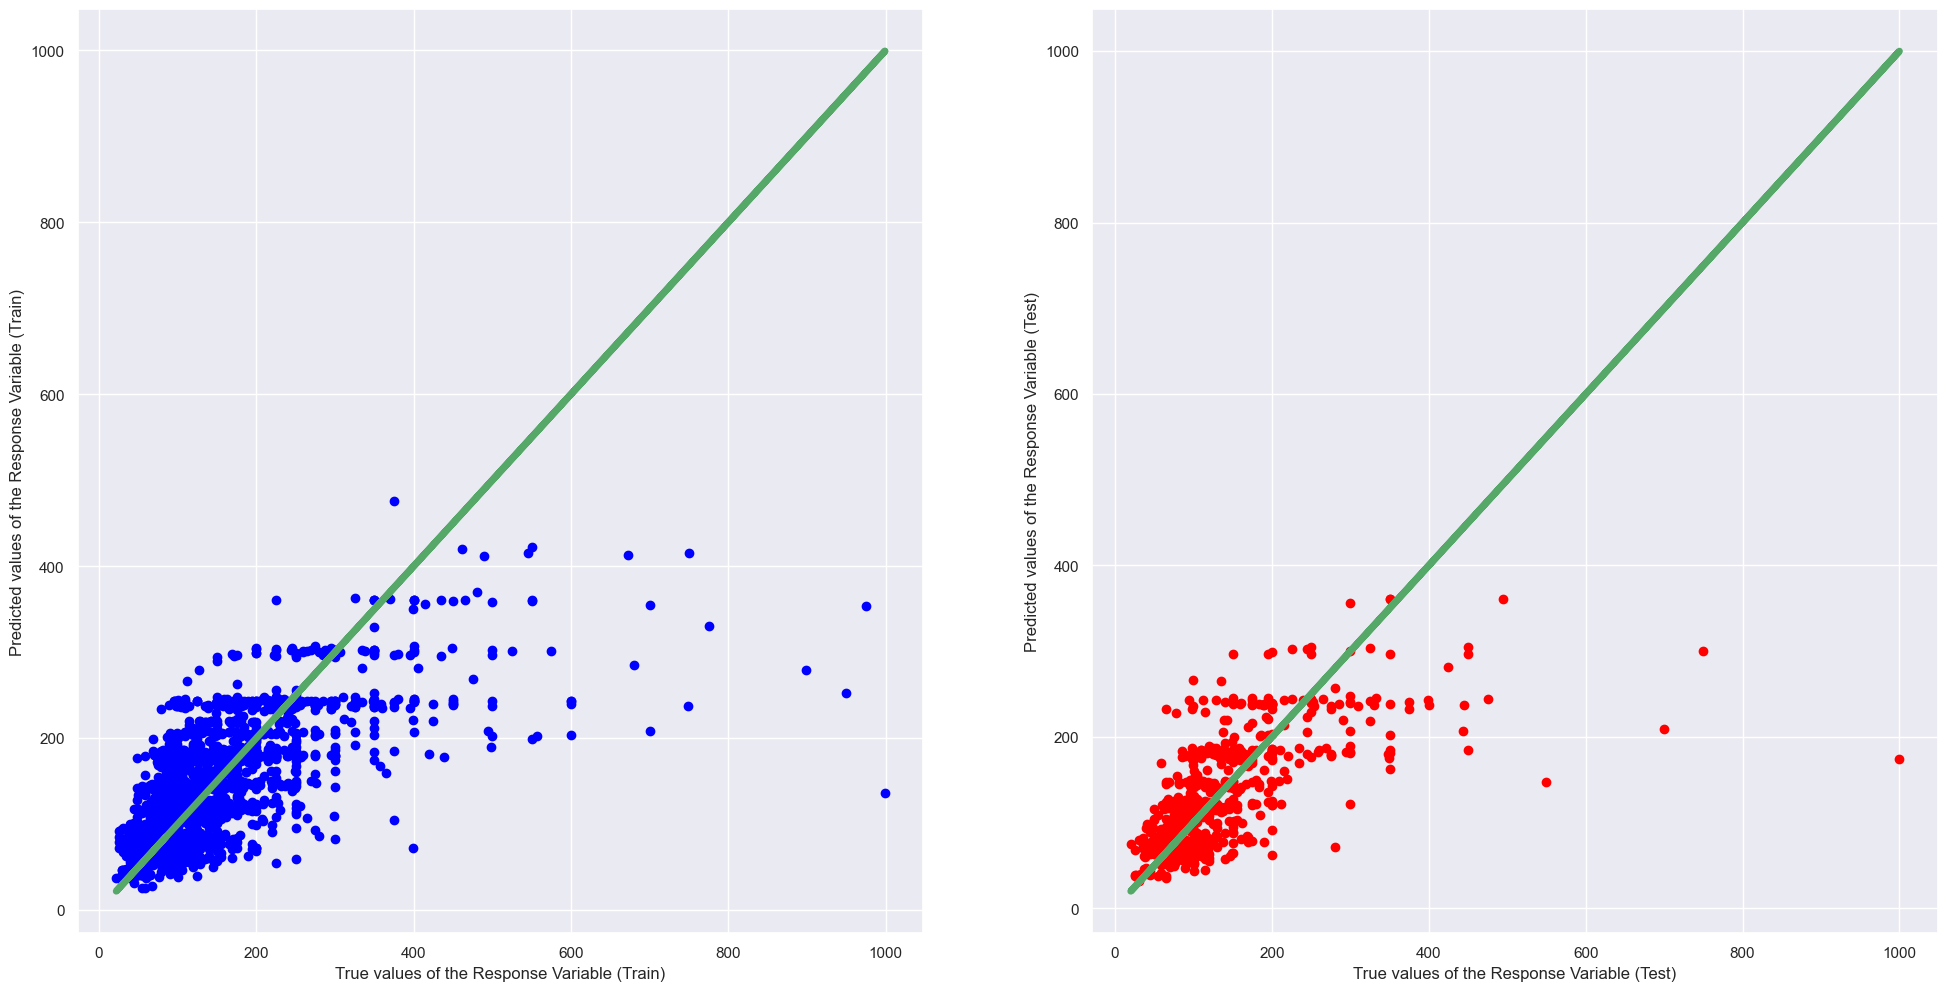

In [20]:
# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, trainPredictionLR, color = "blue")
axes[0].plot(y_train, y_train, 'g-', linewidth = 5)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, testPredictionLR, color = "red")
axes[1].plot(y_test, y_test, 'g-', linewidth = 5)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

### MODEL 2: Ridge Regression


Ridge Regression is meant to be an upgrade to linear regression. It is similar to linear regression where it can be used to for regression and classification.

Ridge Regression is good at handling overfitting.

The difference in the equation for Ridge Regression is that it penalize RSS by adding another term and search for the minimization.

We can iterate different 
 values as the additional term to find the best fit for a Ridge Regression model.

Ridge Regression does not drop any predictors unlike Lasso Regression, which is we will observe later on that the beta estimate will only converge to zero, but never reach zero.

In [21]:
varArr = np.array(["bedrooms", "breakfast", "tv", "white_goods", "elevator", "gym", "hot_tub_sauna_or_pool",
                   "internet", "pets_allowed", "secure", "accessible","number_of_reviews","room_type_Entire_home_apt",
                   "room_type_Private room", "room_type_Shared_room", "property_type_Apartment",
                   "property_type_Bed_and_Breakfast", "property_type_Condominium", "property_type_House",
                   "property_type_Loft", "property_type_Other", "property_type_Townhouse"])

In [ ]:
ridgereg=Ridge(alpha=0).fit(X_train, y_train)


ridgeTrainPred=[]
ridgeTestPred=[]
ridgeR2score=[]
paravalue=[]

para=np.arange(0,2000,1)

ridgeDF=pd.DataFrame({'variable': varArr, 'estimate': ridgereg.coef_.ravel()})

for i in para:
    